In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import geopandas as gpd
from fiona.crs import from_epsg
import geopandas as gpd
import os
import pandas as pd

In [3]:
# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [5]:
dong_shp = gpd.read_file('/content/drive/MyDrive/new_project1/data/seoul_shp/dong/bnd_dong_11_2023_2023_2Q.shp')
dong_shp.head()

,BASE_DATE,ADM_NM,ADM_CD,geometry
0,20230701,사직동,11010530,"POLYGON ((953553.932 1953335.741, 953555.211 1..."
1,20230701,삼청동,11010540,"POLYGON ((954025.242 1953916.389, 954026.972 1..."
2,20230701,부암동,11010550,"POLYGON ((952490.380 1956548.821, 952497.594 1..."
3,20230701,평창동,11010560,"POLYGON ((953683.828 1959209.871, 953665.283 1..."
4,20230701,한남동,11030740,"POLYGON ((956238.296 1950166.610, 956237.942 1..."


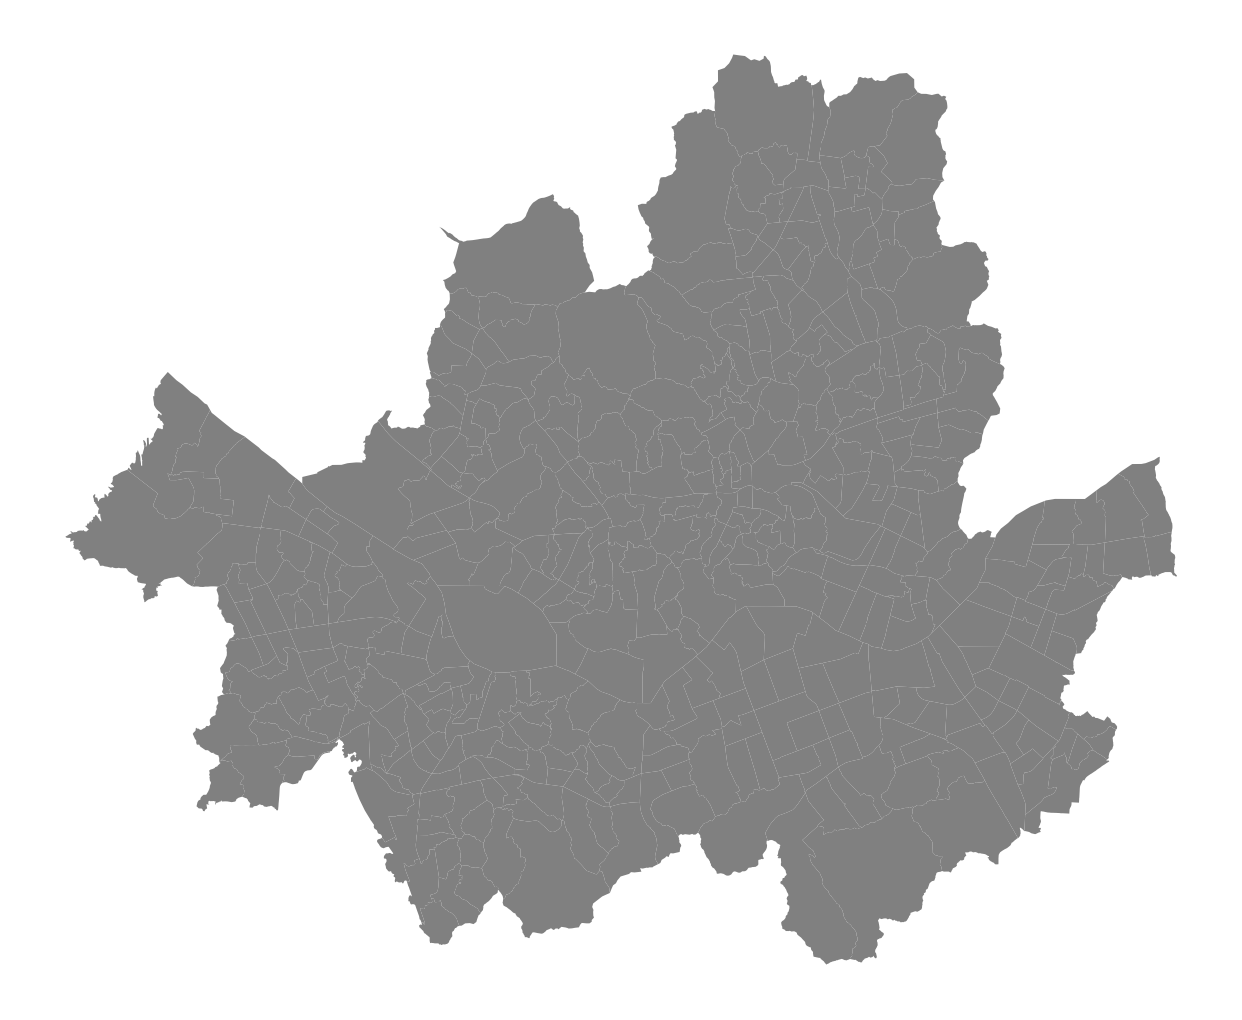

In [6]:
fig = plt.figure(figsize=(18, 13))
ax = fig.subplots(1, 1)

dong_shp.plot(color='gray', ax=ax)

ax.set_axis_off()
plt.show()

In [7]:
df = pd.read_csv('/content/drive/MyDrive/new_project1/data/chodata/동별 지가변동률 최종.csv')
df

,시군구명,읍면동명,변동률,누계
0,종로구,청운동,0.392,4.308
1,종로구,신교동,0.392,4.308
2,종로구,궁정동,0.392,4.308
3,종로구,효자동,0.409,4.126
4,종로구,창성동,0.409,4.126
...,...,...,...,...
462,강동구,둔촌동,0.416,4.201
463,강동구,암사동,0.428,4.698
464,강동구,성내동,0.495,5.364
465,강동구,천호동,0.433,6.381


In [8]:
df = df.rename(columns={'시군구명': '자치구', '읍면동명': '행정동명'})
df

,자치구,행정동명,변동률,누계
0,종로구,청운동,0.392,4.308
1,종로구,신교동,0.392,4.308
2,종로구,궁정동,0.392,4.308
3,종로구,효자동,0.409,4.126
4,종로구,창성동,0.409,4.126
...,...,...,...,...
462,강동구,둔촌동,0.416,4.201
463,강동구,암사동,0.428,4.698
464,강동구,성내동,0.495,5.364
465,강동구,천호동,0.433,6.381


In [9]:
df.index = range(1, len(df) + 1)
df

,자치구,행정동명,변동률,누계
1,종로구,청운동,0.392,4.308
2,종로구,신교동,0.392,4.308
3,종로구,궁정동,0.392,4.308
4,종로구,효자동,0.409,4.126
5,종로구,창성동,0.409,4.126
...,...,...,...,...
463,강동구,둔촌동,0.416,4.201
464,강동구,암사동,0.428,4.698
465,강동구,성내동,0.495,5.364
466,강동구,천호동,0.433,6.381


In [10]:
df2 = pd.read_csv('/content/drive/MyDrive/new_project1/data/complete/동코드(주소).csv')
df2

,구,법정동,행정동,code10,code8,code7
0,종로구,청운효자동,청운동,1111051500,1105150,110515
1,종로구,청운효자동,신교동,1111051500,1105150,110515
2,종로구,청운효자동,궁정동,1111051500,1105150,110515
3,종로구,청운효자동,효자동,1111051500,1105150,110515
4,종로구,청운효자동,창성동,1111051500,1105150,110515
...,...,...,...,...,...,...
740,강동구,성내제2동,성내동,1174065000,7406500,740650
741,강동구,성내제3동,성내동,1174066000,7406600,740660
742,강동구,길동,길동,1174068500,7406850,740685
743,강동구,둔촌제1동,둔촌동,1174069000,7406900,740690


In [11]:
df2.rename(columns={'구': '자치구', '행정동' : '행정동명'}, inplace =True)

In [12]:
merged_df = pd.merge(df2, df, on=['자치구', '행정동명'], how='left')
merged_df

,자치구,법정동,행정동명,code10,code8,code7,변동률,누계
0,종로구,청운효자동,청운동,1111051500,1105150,110515,0.392,4.308
1,종로구,청운효자동,신교동,1111051500,1105150,110515,0.392,4.308
2,종로구,청운효자동,궁정동,1111051500,1105150,110515,0.392,4.308
3,종로구,청운효자동,효자동,1111051500,1105150,110515,0.409,4.126
4,종로구,청운효자동,창성동,1111051500,1105150,110515,0.409,4.126
...,...,...,...,...,...,...,...,...
740,강동구,성내제2동,성내동,1174065000,7406500,740650,0.495,5.364
741,강동구,성내제3동,성내동,1174066000,7406600,740660,0.495,5.364
742,강동구,길동,길동,1174068500,7406850,740685,0.389,4.635
743,강동구,둔촌제1동,둔촌동,1174069000,7406900,740690,0.416,4.201


In [13]:
grouped_df = merged_df.groupby(['자치구', '법정동']).agg({'변동률': 'mean', '누계': 'mean'}).reset_index()

grouped_df

,자치구,법정동,변동률,누계
0,강남구,개포1동,0.524000,4.771000
1,강남구,개포2동,0.517000,4.756500
2,강남구,개포3동,0.545333,5.531333
3,강남구,개포4동,0.524000,4.771000
4,강남구,논현1동,0.564000,5.016000
...,...,...,...,...
421,중랑구,상봉제2동,0.282000,3.773000
422,중랑구,신내1동,0.243000,3.886000
423,중랑구,신내2동,0.243000,3.886000
424,중랑구,중화제1동,0.266000,3.904000


In [14]:
grouped_df.index = grouped_df.index + 1

In [15]:
grouped_df

,자치구,법정동,변동률,누계
1,강남구,개포1동,0.524000,4.771000
2,강남구,개포2동,0.517000,4.756500
3,강남구,개포3동,0.545333,5.531333
4,강남구,개포4동,0.524000,4.771000
5,강남구,논현1동,0.564000,5.016000
...,...,...,...,...
422,중랑구,상봉제2동,0.282000,3.773000
423,중랑구,신내1동,0.243000,3.886000
424,중랑구,신내2동,0.243000,3.886000
425,중랑구,중화제1동,0.266000,3.904000


In [16]:
grouped_df = merged_df.groupby(['자치구', '법정동']).agg({
    '변동률': 'mean',
    '누계': 'mean',
    'code10': 'first'
}).reset_index()

grouped_df

,자치구,법정동,변동률,누계,code10
0,강남구,개포1동,0.524000,4.771000,1168066000
1,강남구,개포2동,0.517000,4.756500,1168067000
2,강남구,개포3동,0.545333,5.531333,1168067500
3,강남구,개포4동,0.524000,4.771000,1168069000
4,강남구,논현1동,0.564000,5.016000,1168052100
...,...,...,...,...,...
421,중랑구,상봉제2동,0.282000,3.773000,1126059000
422,중랑구,신내1동,0.243000,3.886000,1126068000
423,중랑구,신내2동,0.243000,3.886000,1126069000
424,중랑구,중화제1동,0.266000,3.904000,1126060000


In [17]:
grouped_df['변동률'] = grouped_df['변동률'].round(3)
grouped_df['누계'] = grouped_df['누계'].round(3)

In [18]:
grouped_df

,자치구,법정동,변동률,누계,code10
0,강남구,개포1동,0.524,4.771,1168066000
1,강남구,개포2동,0.517,4.756,1168067000
2,강남구,개포3동,0.545,5.531,1168067500
3,강남구,개포4동,0.524,4.771,1168069000
4,강남구,논현1동,0.564,5.016,1168052100
...,...,...,...,...,...
421,중랑구,상봉제2동,0.282,3.773,1126059000
422,중랑구,신내1동,0.243,3.886,1126068000
423,중랑구,신내2동,0.243,3.886,1126069000
424,중랑구,중화제1동,0.266,3.904,1126060000


In [19]:
grouped_df['구동'] = grouped_df['자치구'] + ' ' +grouped_df['법정동']
grouped_df.head()

,자치구,법정동,변동률,누계,code10,구동
0,강남구,개포1동,0.524,4.771,1168066000,강남구 개포1동
1,강남구,개포2동,0.517,4.756,1168067000,강남구 개포2동
2,강남구,개포3동,0.545,5.531,1168067500,강남구 개포3동
3,강남구,개포4동,0.524,4.771,1168069000,강남구 개포4동
4,강남구,논현1동,0.564,5.016,1168052100,강남구 논현1동


In [20]:
grouped_df.rename(columns={'자치구': '시군구', '법정동': '읍면동'}, inplace=True)

In [21]:
grouped_df

,시군구,읍면동,변동률,누계,code10,구동
0,강남구,개포1동,0.524,4.771,1168066000,강남구 개포1동
1,강남구,개포2동,0.517,4.756,1168067000,강남구 개포2동
2,강남구,개포3동,0.545,5.531,1168067500,강남구 개포3동
3,강남구,개포4동,0.524,4.771,1168069000,강남구 개포4동
4,강남구,논현1동,0.564,5.016,1168052100,강남구 논현1동
...,...,...,...,...,...,...
421,중랑구,상봉제2동,0.282,3.773,1126059000,중랑구 상봉제2동
422,중랑구,신내1동,0.243,3.886,1126068000,중랑구 신내1동
423,중랑구,신내2동,0.243,3.886,1126069000,중랑구 신내2동
424,중랑구,중화제1동,0.266,3.904,1126060000,중랑구 중화제1동


In [22]:
import re

In [23]:
grouped_df.drop(columns='code10', inplace=True)

In [24]:
grouped_df['읍면동'] = grouped_df['읍면동'].apply(lambda x: re.sub(r'[·.]', '', x))
grouped_df[grouped_df['읍면동'].str.contains('[·.]')]

,시군구,읍면동,변동률,누계,구동


In [25]:
grouped_df['구동'] = grouped_df['시군구'] + ' ' +grouped_df['읍면동']
grouped_df.head()

,시군구,읍면동,변동률,누계,구동
0,강남구,개포1동,0.524,4.771,강남구 개포1동
1,강남구,개포2동,0.517,4.756,강남구 개포2동
2,강남구,개포3동,0.545,5.531,강남구 개포3동
3,강남구,개포4동,0.524,4.771,강남구 개포4동
4,강남구,논현1동,0.564,5.016,강남구 논현1동


In [26]:
grouped_df2 = grouped_df[['구동', '변동률', '누계']]
grouped_df2

,구동,변동률,누계
0,강남구 개포1동,0.524,4.771
1,강남구 개포2동,0.517,4.756
2,강남구 개포3동,0.545,5.531
3,강남구 개포4동,0.524,4.771
4,강남구 논현1동,0.564,5.016
...,...,...,...
421,중랑구 상봉제2동,0.282,3.773
422,중랑구 신내1동,0.243,3.886
423,중랑구 신내2동,0.243,3.886
424,중랑구 중화제1동,0.266,3.904


In [27]:
grouped_df2.rename(columns={'변동률': '지가 변동률', '누계': '지가 누계'}, inplace=True)

<ipython-input-27-11752206a36b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df2.rename(columns={'변동률': '지가 변동률', '누계': '지가 누계'}, inplace=True)


In [28]:
grouped_df2

,구동,지가 변동률,지가 누계
0,강남구 개포1동,0.524,4.771
1,강남구 개포2동,0.517,4.756
2,강남구 개포3동,0.545,5.531
3,강남구 개포4동,0.524,4.771
4,강남구 논현1동,0.564,5.016
...,...,...,...
421,중랑구 상봉제2동,0.282,3.773
422,중랑구 신내1동,0.243,3.886
423,중랑구 신내2동,0.243,3.886
424,중랑구 중화제1동,0.266,3.904


In [31]:
region_code = pd.read_csv('/content/drive/MyDrive/new_project1/data/complete/region_code.csv')
region_code.head()

,ADM_CD,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동
0,11010530,서울특별시 종로구 사직동,1101053,1111053000,11010530,11110530,11110530,서울특별시,종로구,사직동
1,11010540,서울특별시 종로구 삼청동,1101054,1111054000,11010540,11110540,11110540,서울특별시,종로구,삼청동
2,11010550,서울특별시 종로구 부암동,1101055,1111055000,11010550,11110550,11110550,서울특별시,종로구,부암동
3,11010560,서울특별시 종로구 평창동,1101056,1111056000,11010560,11110560,11110560,서울특별시,종로구,평창동
4,11030740,서울특별시 용산구 한남동,1103074,1117068500,11030740,11170685,11170685,서울특별시,용산구,한남동


In [32]:
dong_shp['ADM_CD'] = dong_shp['ADM_CD'].astype('int')

In [33]:
region_code['ADM_CD'] = region_code['ADM_CD'].astype('int')

In [34]:
map_base = dong_shp.merge(region_code,
                          how = 'left',
                          on = 'ADM_CD')
map_base.head()

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동
0,20230701,사직동,11010530,"POLYGON ((953553.932 1953335.741, 953555.211 1...",서울특별시 종로구 사직동,1101053,1111053000,11010530,11110530,11110530,서울특별시,종로구,사직동
1,20230701,삼청동,11010540,"POLYGON ((954025.242 1953916.389, 954026.972 1...",서울특별시 종로구 삼청동,1101054,1111054000,11010540,11110540,11110540,서울특별시,종로구,삼청동
2,20230701,부암동,11010550,"POLYGON ((952490.380 1956548.821, 952497.594 1...",서울특별시 종로구 부암동,1101055,1111055000,11010550,11110550,11110550,서울특별시,종로구,부암동
3,20230701,평창동,11010560,"POLYGON ((953683.828 1959209.871, 953665.283 1...",서울특별시 종로구 평창동,1101056,1111056000,11010560,11110560,11110560,서울특별시,종로구,평창동
4,20230701,한남동,11030740,"POLYGON ((956238.296 1950166.610, 956237.942 1...",서울특별시 용산구 한남동,1103074,1117068500,11030740,11170685,11170685,서울특별시,용산구,한남동


In [36]:
map_base['ADM_NM'] = map_base['ADM_NM'].apply(lambda x: re.sub(r'\·', '', x))

In [37]:
map_base['key1'] = map_base['시군구'] + ' ' + map_base['ADM_NM']
map_base['key2'] = map_base['시군구'] + ' ' + map_base['읍면동']

In [38]:
map_base[['key1', 'key2']]

,key1,key2
0,종로구 사직동,종로구 사직동
1,종로구 삼청동,종로구 삼청동
2,종로구 부암동,종로구 부암동
3,종로구 평창동,종로구 평창동
4,용산구 한남동,용산구 한남동
...,...,...
421,종로구 가회동,종로구 가회동
422,종로구 종로1234가동,종로구 종로1234가동
423,서초구 방배2동,서초구 방배2동
424,강북구 미아동,강북구 미아동


In [39]:
final2 = map_base.merge(grouped_df2.rename(columns = {'구동' : 'key2'}),
                       how = 'left',
                       on = 'key2')
final2

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동,key1,key2,지가 변동률,지가 누계
0,20230701,사직동,11010530,"POLYGON ((953553.932 1953335.741, 953555.211 1...",서울특별시 종로구 사직동,1101053,1111053000,11010530,11110530,11110530,서울특별시,종로구,사직동,종로구 사직동,종로구 사직동,0.445,4.353
1,20230701,삼청동,11010540,"POLYGON ((954025.242 1953916.389, 954026.972 1...",서울특별시 종로구 삼청동,1101054,1111054000,11010540,11110540,11110540,서울특별시,종로구,삼청동,종로구 삼청동,종로구 삼청동,0.412,4.253
2,20230701,부암동,11010550,"POLYGON ((952490.380 1956548.821, 952497.594 1...",서울특별시 종로구 부암동,1101055,1111055000,11010550,11110550,11110550,서울특별시,종로구,부암동,종로구 부암동,종로구 부암동,0.488,4.741
3,20230701,평창동,11010560,"POLYGON ((953683.828 1959209.871, 953665.283 1...",서울특별시 종로구 평창동,1101056,1111056000,11010560,11110560,11110560,서울특별시,종로구,평창동,종로구 평창동,종로구 평창동,0.403,4.131
4,20230701,한남동,11030740,"POLYGON ((956238.296 1950166.610, 956237.942 1...",서울특별시 용산구 한남동,1103074,1117068500,11030740,11170685,11170685,서울특별시,용산구,한남동,용산구 한남동,용산구 한남동,0.466,5.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,20230701,가회동,11010600,"POLYGON ((954894.795 1954614.580, 954888.290 1...",서울특별시 종로구 가회동,1101060,1111060000,11010600,11110600,11110600,서울특별시,종로구,가회동,종로구 가회동,종로구 가회동,0.417,4.162
422,20230701,종로1234가동,11010610,"POLYGON ((954918.389 1954371.538, 954926.411 1...",서울특별시 종로구 종로1·2·3·4가동,1101061,1111061500,11010610,11110615,11110615,서울특별시,종로구,종로1234가동,종로구 종로1234가동,종로구 종로1234가동,0.421,4.302
423,20230701,방배2동,11220630,"POLYGON ((954967.724 1942969.970, 954985.115 1...",서울특별시 서초구 방배2동,1122063,1165061000,11220630,11650610,11650610,서울특별시,서초구,방배2동,서초구 방배2동,서초구 방배2동,0.803,6.084
424,20230701,미아동,11090700,"POLYGON ((958301.054 1959603.612, 958292.609 1...",서울특별시 강북구 미아동,1109070,1130553500,11090700,11305535,11305535,서울특별시,강북구,미아동,강북구 미아동,강북구 미아동,0.330,4.088


In [40]:
final2[final2['지가 누계'].isna()]

,BASE_DATE,ADM_NM,ADM_CD,geometry,dong_name,통계청코드,도로명코드10,통계청코드8,도로명코드8,도로명코드,시도명,시군구,읍면동,key1,key2,지가 변동률,지가 누계


In [42]:
final2['지가 변동률'] = final2['지가 변동률'].fillna(0)

In [50]:
top5 = final2.nlargest(5, '지가 변동률')

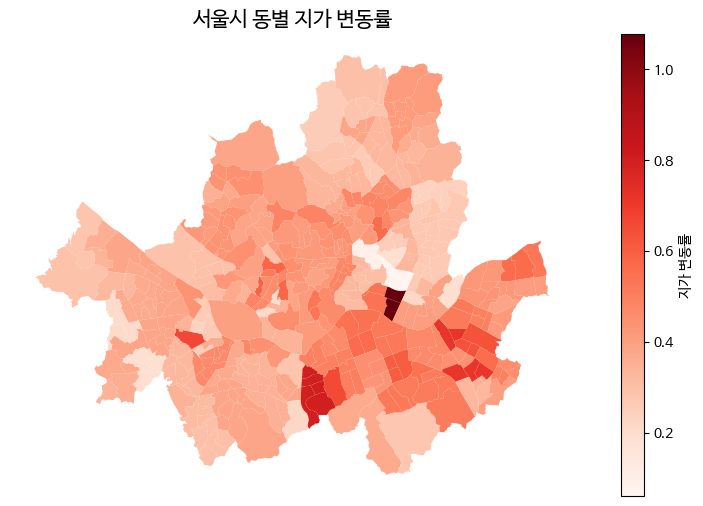

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 전체 지도 색칠
final2.plot(ax=ax, column='지가 변동률', cmap='Reds', legend=True, legend_kwds={'label': "지가 변동률"})


ax.set_title('서울시 동별 지가 변동률', fontsize=15)
ax.axis('off')

plt.show()

In [47]:
import matplotlib.pyplot as plt

In [ ]:
top21 = final2.nlargest(20, '지가 누계')

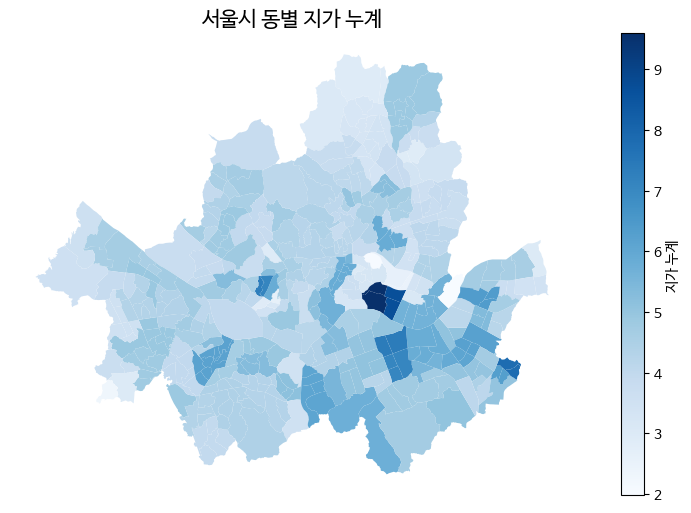

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# 전체 지도 색칠
final2.plot(ax=ax, column='지가 누계', cmap='Blues', legend=True, legend_kwds={'label': "지가 누계"})

ax.set_title('서울시 동별 지가 누계', fontsize=15)
ax.axis('off')

plt.show()